# This dataset is 10x larger than in Decision-Trees-1 (i.e. 1k samples)

In [1]:
import sklearn
from sklearn import datasets
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
import pandas
import seaborn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix


Bad key “backend in file /Users/guillermo/.matplotlib/matplotlibrc, line 1 ('“backend: TkAgg”')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


#### Mask the dataset creation for educational purposes (viewer: do not open)

In [2]:
data, labels = datasets.make_classification(n_samples=1000,                                                                                 n_features=5, n_classes=2, n_informative=3, n_redundant=0, n_repeated=0, random_state=7)

#### Frame the data with features names for educational purposes

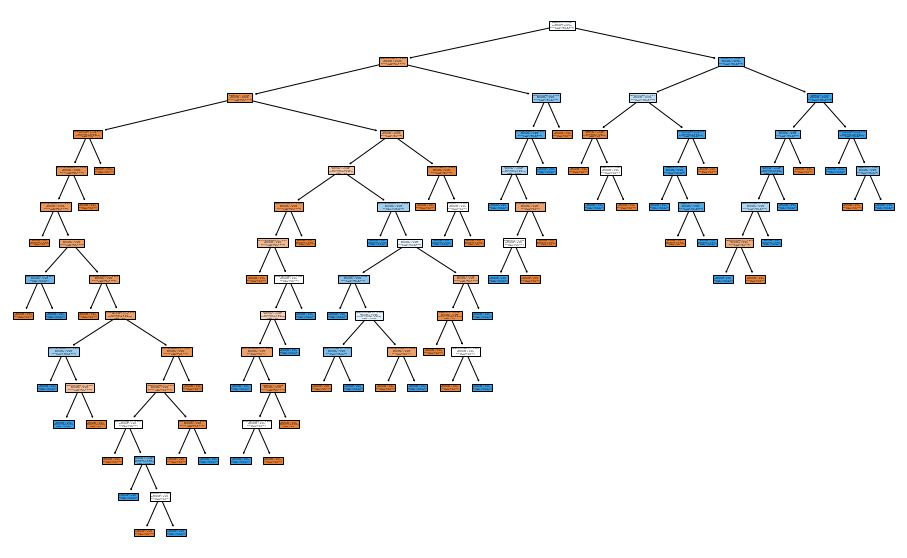

Average Accuracy: 89.0%


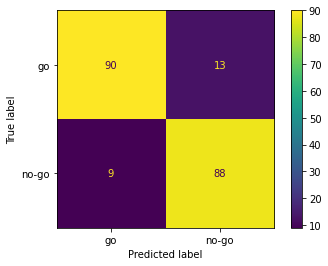

In [3]:
df_data = pandas.DataFrame(data, columns=['comms', 'remote access', 'weather', 'external partners', 'physical access'])
df_labels = pandas.DataFrame(labels, columns=['go/no-go criterion']) # go=0, no-go=1
dataset = pandas.concat([df_data, df_labels], axis=1)  # put observations and label data together
# dataset.head()  # view some of the data for sanity check

data_train, data_test, labels_train, labels_test = model_selection.train_test_split(df_data, df_labels, test_size=0.2, random_state=7)

my_decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=7)

my_decision_tree.fit(X=data_train, y=labels_train)

plt.figure(figsize=(16,10))
tree.plot_tree(my_decision_tree, feature_names=data_train.columns, class_names=['go', 'no-go'], filled=True, proportion=True)
plt.show()
avg_accuracy = my_decision_tree.score(X=data_test, y=labels_test)
print('Average Accuracy: {}%'.format(avg_accuracy * 100))
plot_confusion_matrix(my_decision_tree, X=data_test, y_true=labels_test, display_labels=['go', 'no-go'])

# Feature to Model Analysis

In [4]:
from sklearn.inspection import permutation_importance
def plot_importance(estimator, xtrain, ytrain, title, font_size=16, features=None):
    results = permutation_importance(estimator, xtrain, ytrain, random_state=7)
    axx = pandas.DataFrame(results['importances_mean']).T.plot(grid=True, kind='bar')
    axx.legend(features, fontsize=font_size)
    axx.set_title(title, fontsize=font_size)
    axx.set_xlabel('features', fontsize=font_size)
    axx.set_ylabel('score', fontsize=font_size)
    return results

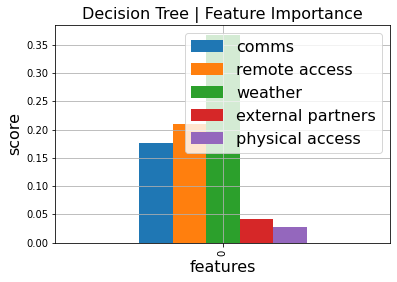

In [5]:
x = plot_importance(my_decision_tree, data_train, labels_train, title='Decision Tree | Feature Importance', features=data_train.columns)

## Here you should definitely know about conecpt drift since now the Weather feature is the most important!

#### As an exercise, choose different features to drop and graph the decision tree's logic. Does anything happen to its logic?

This function will also present your model's accuracy and confusion matrix

In [6]:
def plot_not_these_features(features=['weather', 'external partners']):
    temp_data_train = data_train.drop(columns=features)
    temp_data_test = data_test.drop(columns=features)
    the_tree = DecisionTreeClassifier(criterion='entropy', random_state=7)
    the_tree.fit(X=temp_data_train, y=labels_train)
    
    # Plot Decision Tree's logic
    plt.figure(figsize=(16,12))
    tree.plot_tree(the_tree, feature_names=temp_data_train.columns, class_names=['go', 'no-go'], filled=True, proportion=True)
    plt.show()
    
    # Print tree's accuracy
    mean_accuracy = the_tree.score(X=temp_data_test, y=labels_test)
    print('\nmean accuracy: {}%\n'.format(mean_accuracy * 100))
    
    # Plot confusion matrix
    plot_confusion_matrix(the_tree, X=temp_data_test, y_true=labels_test, display_labels=['go', 'no-go'])

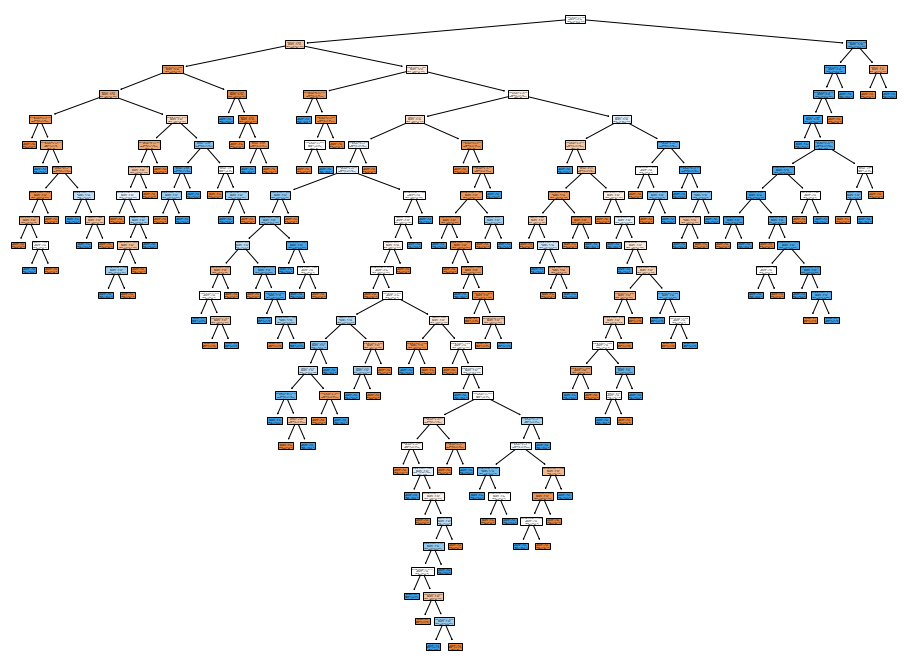


mean accuracy: 68.5%



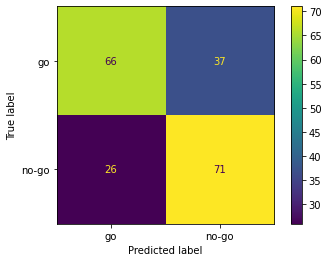

In [7]:
plot_not_these_features(features=['weather'])